# Movie Gross Modelling

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

## Step 1: Read in Data

In [2]:
df = pd.read_csv('movie_train_data.csv', index_col=0)
print(df.shape)
df.head()


(2500, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross
1630,Color,Luis Mandoki,85.0,131.0,43.0,362.0,John Savage,18000.0,Drama|Romance,Robin Wright,Message in a Bottle,28942,19815,Raphael Sbarge,0.0,beach|bottle|jogging|letter|love,http://www.imdb.com/title/tt0139462/?ref_=fn_t...,223.0,English,USA,PG-13,55000000.0,1999.0,652.0,6.1,2.35,0,52799004.0
1254,Color,Greg Mottola,342.0,109.0,99.0,57.0,Nelson Ascencio,176.0,Adventure|Comedy|Sci-Fi,Bobby Lee,Paul,192462,390,Jeremy Owen,0.0,alien|geek|nerd|road trip|ufo,http://www.imdb.com/title/tt1092026/?ref_=fn_t...,334.0,English,USA,R,40000000.0,2011.0,61.0,7.0,2.35,42000,37371385.0
1680,Color,Nicholas Stoller,232.0,131.0,89.0,372.0,Jacki Weaver,2000.0,Comedy|Romance,Alison Brie,The Five-Year Engagement,78974,3479,David Paymer,2.0,kissing while having sex|kitchen|reference to ...,http://www.imdb.com/title/tt1195478/?ref_=fn_t...,141.0,English,USA,R,30000000.0,2012.0,401.0,6.2,1.85,11000,28644770.0
2300,Color,Paul Thomas Anderson,401.0,148.0,0.0,175.0,Katherine Waterston,204.0,Comedy|Crime|Drama|Mystery|Romance,Martin Dew,Inherent Vice,61935,707,Serena Scott Thomas,0.0,1960s|based on novel|ex boyfriend ex girlfrien...,http://www.imdb.com/title/tt1791528/?ref_=fn_t...,242.0,English,USA,R,20000000.0,2014.0,178.0,6.7,1.85,18000,8093318.0
1844,Color,Wes Craven,224.0,85.0,0.0,178.0,Carl Gilliard,332.0,Mystery|Thriller,Robert Pine,Red Eye,94108,1090,Suzie Plakson,0.0,airport|flight|hotel|hotel manager|plane,http://www.imdb.com/title/tt0421239/?ref_=fn_t...,673.0,English,USA,PG-13,26000000.0,2005.0,285.0,6.5,2.35,0,57859105.0


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [3]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
g

In [4]:
df.drop(columns=['aspect_ratio', 'plot_keywords', 
                 'movie_facebook_likes', 'genres','imdb_score',
                 'num_user_for_reviews', 'movie_imdb_link', 'num_voted_users',
                 'num_critic_for_reviews'], inplace=True)

In [5]:
df['country'].value_counts()

USA    2500
Name: country, dtype: int64

In [6]:
df['content_rating'].value_counts()

R        1117
PG-13     922
PG        398
G          63
Name: content_rating, dtype: int64

In [7]:
df['language'].value_counts()

English    2500
Name: language, dtype: int64

<AxesSubplot:>

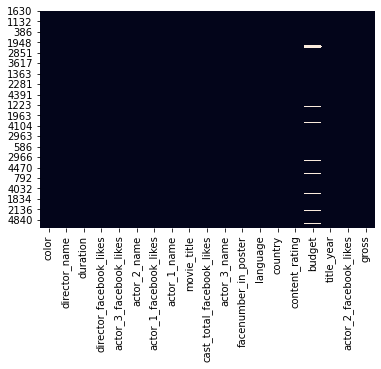

In [8]:
sns.heatmap(df.isna(), cbar=False)

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

<AxesSubplot:>

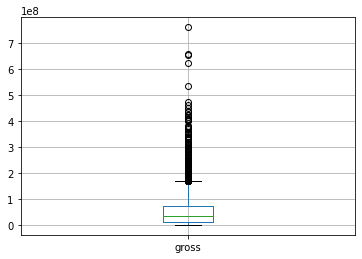

In [9]:
df.boxplot(['gross'])

<AxesSubplot:>

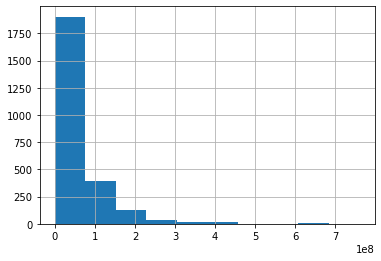

In [10]:
df['gross'].hist()

In [11]:
df.describe()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,gross
count,2499.000000,2500.000000,2497.000000,2500.000000,2500.000000,2497.000000,2.382000e+03,2500.000000,2499.000000,2.500000e+03
mean,109.221689,866.975200,827.032038,8343.568400,12458.762400,1.434922,4.068471e+07,2003.504800,2202.673069,5.639740e+07
std,22.024798,3298.306388,1948.306217,17851.287857,21408.614158,2.196996,4.344595e+07,8.631557,4945.875486,7.236286e+07
min,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,1939.000000,0.000000,7.030000e+02
25%,95.000000,10.000000,242.000000,826.000000,2316.000000,0.000000,1.100000e+07,1999.000000,455.000000,1.090070e+07
50%,105.000000,57.500000,484.000000,2000.000000,4582.000000,1.000000,2.600000e+07,2005.000000,739.000000,3.322234e+07
75%,119.000000,219.500000,726.000000,13000.000000,16764.750000,2.000000,5.500000e+07,2010.000000,1000.000000,7.365136e+07
max,330.000000,23000.000000,23000.000000,640000.000000,656730.000000,43.000000,3.000000e+08,2016.000000,137000.000000,7.605058e+08


In [12]:
df['actor_1_facebook_likes']= np.where(df['actor_1_facebook_likes'] >200000, 200000, df['actor_1_facebook_likes'])
df['actor_2_facebook_likes']= np.where(df['actor_2_facebook_likes'] >100000, 100000, df['actor_2_facebook_likes'])
df['cast_total_facebook_likes']= np.where(df['cast_total_facebook_likes'] >300000, 300000, df['cast_total_facebook_likes'])

In [13]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.0004
director_name                0.0000
duration                     0.0004
director_facebook_likes      0.0000
actor_3_facebook_likes       0.0012
actor_2_name                 0.0004
actor_1_facebook_likes       0.0000
actor_1_name                 0.0000
movie_title                  0.0000
cast_total_facebook_likes    0.0000
actor_3_name                 0.0012
facenumber_in_poster         0.0012
language                     0.0000
country                      0.0000
content_rating               0.0000
budget                       0.0472
title_year                   0.0000
actor_2_facebook_likes       0.0004
gross                        0.0000
dtype: float64

<AxesSubplot:xlabel='content_rating'>

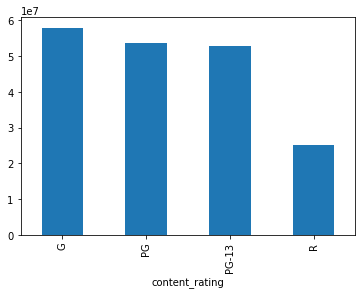

In [14]:
df.groupby('content_rating')['budget'].mean().plot(kind='bar')

In [15]:
budget_ratings = df.groupby('content_rating')['budget'].mean().round(1).to_dict()

budget_ratings

{'G': 57937616.7, 'PG': 53613525.3, 'PG-13': 52682723.4, 'R': 25223942.9}

In [16]:
df['budget'].fillna(df['content_rating'].map(budget_ratings), inplace=True)


In [17]:
df.isna().mean()

color                        0.0004
director_name                0.0000
duration                     0.0004
director_facebook_likes      0.0000
actor_3_facebook_likes       0.0012
actor_2_name                 0.0004
actor_1_facebook_likes       0.0000
actor_1_name                 0.0000
movie_title                  0.0000
cast_total_facebook_likes    0.0000
actor_3_name                 0.0012
facenumber_in_poster         0.0012
language                     0.0000
country                      0.0000
content_rating               0.0000
budget                       0.0000
title_year                   0.0000
actor_2_facebook_likes       0.0004
gross                        0.0000
dtype: float64

In [18]:
df['color'].value_counts()

Color               2443
 Black and White      56
Name: color, dtype: int64

In [19]:
df[df['color'].isna()]

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,language,country,content_rating,budget,title_year,actor_2_facebook_likes,gross
1948,NaN,Lasse Hallström,108.0,529.0,690.0,Henry Thomas,17000.0,Channing Tatum,Dear John,19945,Scott Porter,NaN,English,USA,PG-13,25000000.0,2010.0,861.0,80014842.0


In [20]:
df['color'].fillna('Color', inplace=True)

In [21]:
duration_mean = df['duration'].mean()
print(duration_mean)

109.22168867547019


In [22]:
df['duration'].fillna(duration_mean, inplace=True)

In [23]:
df[df['actor_2_facebook_likes'].isna()]

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,language,country,content_rating,budget,title_year,actor_2_facebook_likes,gross
3346,Color,J.C. Chandor,106.0,78.0,NaN,NaN,0.0,Robert Redford,All Is Lost,0,NaN,0.0,English,USA,PG-13,9000000.0,2013.0,NaN,6262942.0


In [24]:
act_2_mean = df['actor_2_facebook_likes'].mean()
print(act_2_mean)

2187.8671468587436


In [25]:
df['actor_2_facebook_likes'].fillna(act_2_mean, inplace=True)

In [26]:
act_3_mean = df['actor_3_facebook_likes'].mean()
print(act_3_mean)

827.0320384461354


In [27]:
df['actor_3_facebook_likes'].fillna(act_3_mean, inplace=True)

In [28]:
df['facenumber_in_poster'].describe()

count    2497.000000
mean        1.434922
std         2.196996
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64

In [29]:
df.drop(columns=['facenumber_in_poster'], inplace = True)

In [30]:
# Find the Percentage of rows missing data
df.isna().mean()

color                        0.0000
director_name                0.0000
duration                     0.0000
director_facebook_likes      0.0000
actor_3_facebook_likes       0.0000
actor_2_name                 0.0004
actor_1_facebook_likes       0.0000
actor_1_name                 0.0000
movie_title                  0.0000
cast_total_facebook_likes    0.0000
actor_3_name                 0.0012
language                     0.0000
country                      0.0000
content_rating               0.0000
budget                       0.0000
title_year                   0.0000
actor_2_facebook_likes       0.0000
gross                        0.0000
dtype: float64

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [31]:
df['superstar'] = np.where(df['actor_1_facebook_likes']>=25000, 1, 0)


### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [32]:
# your code here
df = pd.get_dummies(df, columns=['content_rating', 'color'], drop_first=True)

In [33]:
df.head()

,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,language,country,budget,title_year,actor_2_facebook_likes,gross,superstar,content_rating_PG,content_rating_PG-13,content_rating_R,color_Color
1630,Luis Mandoki,131.0,43.0,362.0,John Savage,18000.0,Robin Wright,Message in a Bottle,19815,Raphael Sbarge,English,USA,55000000.0,1999.0,652.0,52799004.0,0,0,1,0,1
1254,Greg Mottola,109.0,99.0,57.0,Nelson Ascencio,176.0,Bobby Lee,Paul,390,Jeremy Owen,English,USA,40000000.0,2011.0,61.0,37371385.0,0,0,0,1,1
1680,Nicholas Stoller,131.0,89.0,372.0,Jacki Weaver,2000.0,Alison Brie,The Five-Year Engagement,3479,David Paymer,English,USA,30000000.0,2012.0,401.0,28644770.0,0,0,0,1,1
2300,Paul Thomas Anderson,148.0,0.0,175.0,Katherine Waterston,204.0,Martin Dew,Inherent Vice,707,Serena Scott Thomas,English,USA,20000000.0,2014.0,178.0,8093318.0,0,0,0,1,1
1844,Wes Craven,85.0,0.0,178.0,Carl Gilliard,332.0,Robert Pine,Red Eye,1090,Suzie Plakson,English,USA,26000000.0,2005.0,285.0,57859105.0,0,0,1,0,1


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [34]:
#your code here
df['title_year']= pd.to_datetime(df['title_year'], format='%Y')
df['yrs_old']= 2016-  pd.DatetimeIndex(df['title_year']).year

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [35]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [36]:
# your code here
df['budget^2']= df['budget']*df['budget']
df['actor_1_facebook_likes^2'] = df['actor_1_facebook_likes'] * df['actor_1_facebook_likes']   
df['actor_2_facebook_likes^2'] = df['actor_2_facebook_likes'] * df['actor_2_facebook_likes'] 
df['actor_3_facebook_likes^2'] = df['actor_3_facebook_likes'] * df['actor_3_facebook_likes'] 
df['cast_total_facebook_likes^2'] = df['cast_total_facebook_likes'] * df['cast_total_facebook_likes'] 

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [37]:
df.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'actor_1_name', 'movie_title', 'cast_total_facebook_likes',
       'actor_3_name', 'language', 'country', 'budget', 'title_year',
       'actor_2_facebook_likes', 'gross', 'superstar', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'color_Color', 'yrs_old',
       'budget^2', 'actor_1_facebook_likes^2', 'actor_2_facebook_likes^2',
       'actor_3_facebook_likes^2', 'cast_total_facebook_likes^2'],
      dtype='object')

In [38]:
# your code here

df['cast_fb_budget'] = df['cast_total_facebook_likes'] *df['budget']
df['PG_budget'] = df['content_rating_PG'] *df['budget']
df['PG13_budget'] = df['content_rating_PG-13'] *df['budget']
df['R_budget'] = df['content_rating_R'] *df['budget']
df['superstar_budget'] = df['superstar'] *df['budget']
df['cast_fb_budget^2']= df['cast_total_facebook_likes'] *df['budget^2']



## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [39]:
df.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'actor_1_name', 'movie_title', 'cast_total_facebook_likes',
       'actor_3_name', 'language', 'country', 'budget', 'title_year',
       'actor_2_facebook_likes', 'gross', 'superstar', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'color_Color', 'yrs_old',
       'budget^2', 'actor_1_facebook_likes^2', 'actor_2_facebook_likes^2',
       'actor_3_facebook_likes^2', 'cast_total_facebook_likes^2',
       'cast_fb_budget', 'PG_budget', 'PG13_budget', 'R_budget',
       'superstar_budget', 'cast_fb_budget^2'],
      dtype='object')

### 5.1) Perform a train-test split of the data.

In [40]:
#your code here 
features =['duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'budget',
       'actor_2_facebook_likes', 'yrs_old', 'superstar',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R',
       'color_Color', 'budget^2', 'actor_1_facebook_likes^2',
       'actor_2_facebook_likes^2', 'actor_3_facebook_likes^2',
       'cast_total_facebook_likes^2',
       'cast_fb_budget', 'cast_fb_budget^2', 'PG_budget', 'PG13_budget',
       'R_budget', 'superstar_budget']

In [41]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['gross'], random_state=9,test_size=0.2)


### 5.4) Fit the model to the training data.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
#your code here 
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


### 5.5) Use the model to predict on the training set and the test set.

In [45]:
#your code here 
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)


### 5.6) Evaluate the training and test predictions using RMSE.

In [46]:
from sklearn import metrics

In [47]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 55075645.80569117
Test Root Mean Squared Error: 56454466.03083248


In [48]:
test_rmse / df['gross'].std()

0.7801579942469284

### 5.7) Determine if your model is overfit.

In [49]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [50]:
# your code here
df[features].corr()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,budget,actor_2_facebook_likes,yrs_old,superstar,content_rating_PG,content_rating_PG-13,content_rating_R,color_Color,budget^2,actor_1_facebook_likes^2,actor_2_facebook_likes^2,actor_3_facebook_likes^2,cast_total_facebook_likes^2,cast_fb_budget,cast_fb_budget^2,PG_budget,PG13_budget,R_budget,superstar_budget
duration,1.000000,0.208904,0.147379,0.119747,0.152464,0.300243,0.166037,0.135792,0.081126,-0.111448,0.072700,0.038138,-0.034941,0.260892,-0.001186,0.033715,0.126244,0.020830,0.246186,0.216258,-0.083411,0.261243,0.272551,0.158065
director_facebook_likes,0.208904,1.000000,0.144964,0.113900,0.139636,0.102104,0.138904,0.078772,0.085916,-0.004864,-0.006682,0.021773,-0.080136,0.078374,0.014644,0.049157,0.169697,0.037496,0.174420,0.141633,-0.003566,0.067862,0.099606,0.129775
actor_3_facebook_likes,0.147379,0.144964,1.000000,0.287980,0.517673,0.255020,0.572760,-0.117332,0.265995,-0.008225,0.097160,-0.079121,0.022764,0.258239,0.111675,0.221732,0.936530,0.241689,0.614646,0.518972,0.052327,0.241164,0.007484,0.393565
actor_1_facebook_likes,0.119747,0.113900,0.287980,1.000000,0.940276,0.175609,0.491448,-0.103527,0.656101,-0.036613,0.045002,-0.002336,0.022476,0.157023,0.772707,0.358072,0.216339,0.702073,0.494885,0.286015,0.027868,0.131130,0.086540,0.393572
cast_total_facebook_likes,0.152464,0.139636,0.517673,0.940276,1.000000,0.235710,0.717739,-0.126424,0.618308,-0.037739,0.070178,-0.024768,0.021794,0.221975,0.734645,0.502705,0.430239,0.759375,0.633524,0.415615,0.036197,0.193994,0.082256,0.453666
budget,0.300243,0.102104,0.255020,0.175609,0.235710,1.000000,0.246283,-0.229149,0.123971,0.132246,0.215573,-0.327088,0.049192,0.922968,0.021831,0.081213,0.224053,0.062183,0.639867,0.605707,0.409721,0.673415,0.125384,0.339547
actor_2_facebook_likes,0.166037,0.138904,0.572760,0.491448,0.717739,0.246283,1.000000,-0.117024,0.356459,-0.039794,0.062657,-0.016067,0.011628,0.232910,0.269513,0.691879,0.480149,0.455445,0.600071,0.416501,0.037487,0.207702,0.081737,0.376831
yrs_old,0.135792,0.078772,-0.117332,-0.103527,-0.126424,-0.229149,-0.117024,1.000000,-0.090990,0.059026,-0.181239,0.104033,-0.068367,-0.204989,-0.045460,-0.049801,-0.099168,-0.055067,-0.174614,-0.146959,-0.099415,-0.187296,0.018461,-0.099432
superstar,0.081126,0.085916,0.265995,0.656101,0.618308,0.123971,0.356459,-0.090990,1.000000,-0.014928,0.013520,0.006653,0.001340,0.140372,0.401277,0.210514,0.259142,0.357726,0.452138,0.332646,0.023741,0.100685,0.046507,0.691585
content_rating_PG,-0.111448,-0.004864,-0.008225,-0.036613,-0.037739,0.132246,-0.039794,0.059026,-0.014928,1.000000,-0.332611,-0.391058,0.006762,0.097354,-0.019064,-0.019632,-0.017325,-0.021598,0.023593,0.023381,0.715232,-0.215825,-0.232757,0.009425


### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [51]:
# your code here
from sklearn.feature_selection import RFECV

In [52]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7,  scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 

selector.fit(X_train, y_train)


Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.


RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [53]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [54]:
len(selected_rfe)

17

In [55]:
selected_rfe

Index(['duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'cast_total_facebook_likes', 'budget',
       'actor_2_facebook_likes', 'yrs_old', 'superstar', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_R', 'color_Color', 'PG_budget',
       'PG13_budget', 'R_budget', 'superstar_budget'],
      dtype='object')

## Step 7: Evaluate your different models in order to determine the best model overall.

In [56]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)


In [57]:
#your code here 
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])


In [58]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rfe))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Training Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

Training Root Mean Squared Error: 53338434.42625644
Test Root Mean Squared Error: 54937917.30014324


## Step 8:  Refit your best model to the entire dataset.

In [59]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df[selected_rfe], df['gross'])

In [60]:
len(selected_rfe)

17

In [61]:
len(lm.coef_)

17

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

This is exporting your model

In [62]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()



In [63]:
other_info = [budget_ratings, act_2_mean, act_3_mean, duration_mean, selected_rfe]

In [64]:
pickle_out = open('other_info.pickle', "wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()